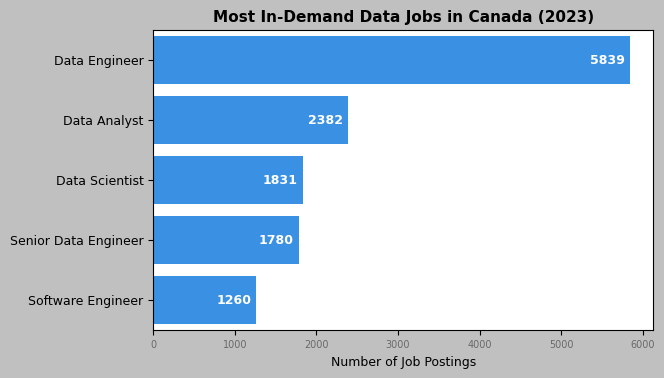

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
top_jobs = pd.read_csv('top_data_jobs_ca.csv')

fig = plt.figure(figsize=(5, 3), facecolor='silver')
axes = fig.add_axes([0, 0, 1, 1])
sb.barplot(y=top_jobs['job_title'], x=top_jobs['job_postings'], errorbar=None, orient='h', color='#1E90FF')
for i, (value, title) in enumerate(zip(top_jobs['job_postings'], top_jobs['job_title'])):
    axes.text(
        value - max(top_jobs['job_postings']) * 0.01,  
        i,
        f'{value}',
        va='center',
        ha='right',
        color='white',
        fontsize=9,
        weight='semibold')
plt.xticks(fontsize=7,c='dimgrey')
plt.yticks(fontsize=9)
axes.set_title('Most In-Demand Data Jobs in Canada (2023)', fontsize=11, weight='semibold')
axes.set_ylabel('')
axes.set_xlabel('Number of Job Postings', fontsize=9)

plt.show()

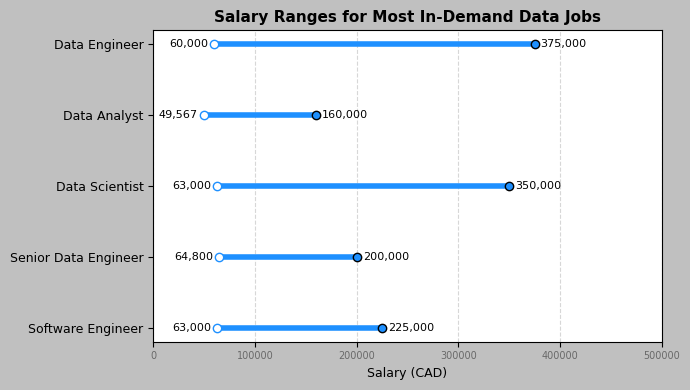

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

top_jobs = pd.read_csv('top_data_jobs_ca.csv')
top_jobs['job_postings'] = top_jobs['job_postings'].astype(int)
top_jobs = top_jobs.sort_values(by='job_postings', ascending=False)

fig, ax = plt.subplots(figsize=(7, 4), facecolor='silver')

for i, row in top_jobs.iterrows():
    min_sal = row['min_salary']
    max_sal = row['max_salary']
    ax.plot([min_sal, max_sal], [i, i], color='dodgerblue', linewidth=4)
    ax.scatter(min_sal, i, color='white', edgecolor='dodgerblue', zorder=3)
    ax.scatter(max_sal, i, color='dodgerblue', edgecolor='black', zorder=3)
    ax.text(min_sal - 6000, i, f"{int(min_sal):,}", va='center', ha='right', fontsize=8, color='black')
    ax.text(max_sal + 6000, i, f"{int(max_sal):,}", va='center', ha='left', fontsize=8, color='black')

ax.set_yticks(range(len(top_jobs)))
ax.set_yticklabels(top_jobs['job_title'], fontsize=9)
ax.set_xlabel('Salary (CAD)', fontsize=9)
ax.set_title('Salary Ranges for Most In-Demand Data Jobs', fontsize=11, weight='semibold')
ax.set_xlim(0, 500000)
ax.invert_yaxis()
plt.xticks(fontsize=7, color='dimgrey')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

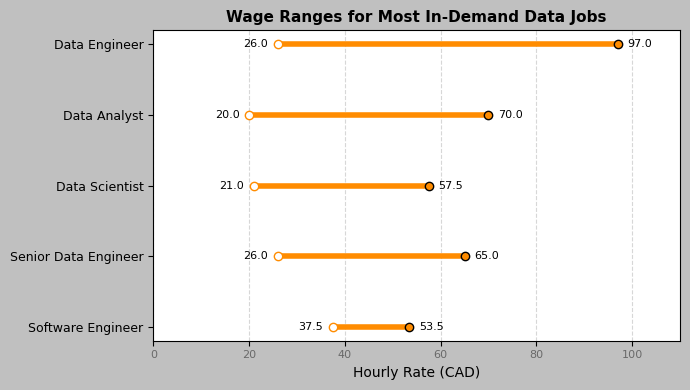

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
top_jobs = pd.read_csv('top_data_jobs_ca.csv')
top_jobs = top_jobs.sort_values(by='job_postings', ascending=False)

fig, ax = plt.subplots(figsize=(7, 4), facecolor='silver')

for i, row in top_jobs.iterrows():
    ax.plot([row['min_hourly'], row['max_hourly']], [i, i], color='darkorange', linewidth=4)
    ax.scatter(row['min_hourly'], i, color='white', edgecolor='darkorange', zorder=3)
    ax.scatter(row['max_hourly'], i, color='darkorange', edgecolor='black', zorder=3)

    ax.text(row['min_hourly'] - 2, i, f"{row['min_hourly']:.1f}", va='center', ha='right', fontsize=8)
    ax.text(row['max_hourly'] + 2, i, f"{row['max_hourly']:.1f}", va='center', ha='left', fontsize=8)

ax.set_yticks(range(len(top_jobs)))
ax.set_yticklabels(top_jobs['job_title'], fontsize=9)
ax.set_xlabel('Hourly Rate (CAD)', fontsize=10)
ax.set_title('Wage Ranges for Most In-Demand Data Jobs', fontsize=11, weight='semibold')
ax.set_xlim(0, 110)
ax.invert_yaxis()
plt.xticks(fontsize=8, c='dimgray')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

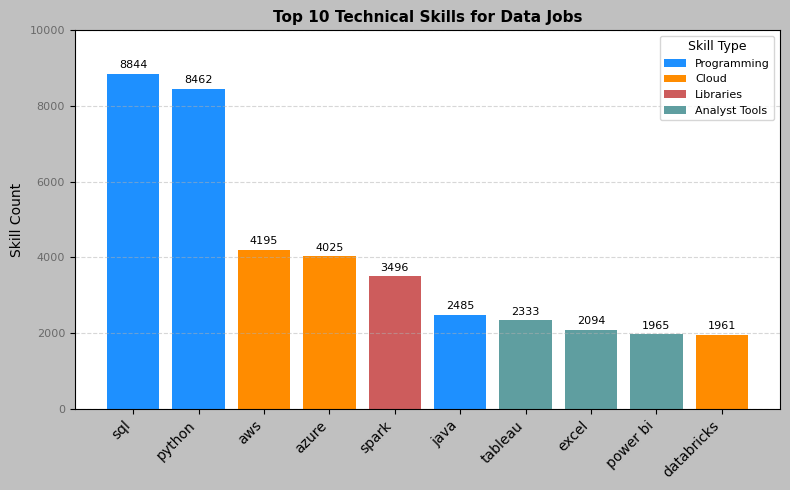

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_skills = pd.read_csv('top_skills_for_data_jobs.csv')

type_colors = {
    'programming': 'dodgerblue',
    'cloud': 'darkorange',
    'libraries': 'indianred',
    'analyst_tools': 'cadetblue'}

top_skills['color'] = top_skills['type'].map(type_colors)

plt.figure(figsize=(8,5), facecolor='silver')
bars = plt.bar(top_skills['skills'], top_skills['skill_count'], color=top_skills['color'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.title('Top 10 Technical Skills for Data Jobs', fontsize=11, weight='semibold')
plt.ylabel('Skill Count', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8, c='dimgray')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 10000)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=clr, label=typ.replace('_', ' ').title()) for typ, clr in type_colors.items()]
plt.legend(handles=legend_elements, title='Skill Type', fontsize=8, title_fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests

jobs_prov = pd.read_csv('job_count_by_province.csv')
jobs_prov['province'] = jobs_prov['province'].str.replace(', Canada', '', regex=False)
jobs_prov['count'] = jobs_prov['count'].astype(int)
geojson_url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/canada.geojson'
canada_geo = requests.get(geojson_url).json()

fig = px.choropleth(
    jobs_prov,
    geojson=canada_geo,
    locations='province',
    featureidkey='properties.name',
    color='count',
    color_continuous_scale='Blues',
    scope='north america',
    labels={'count': 'Job Postings'},
    title='Job Postings by Province in Canada',
    width=1200,
    height=800)

province_centers = {
    'Ontario': [-85, 50],
    'Alberta': [-114, 54],
    'British Columbia': [-123, 52],
    'Quebec': [-71, 52],
    'Nova Scotia': [-61.5, 43],
    'Saskatchewan': [-106, 54],
    'Manitoba': [-97, 54],
    'New Brunswick': [-66.5, 45.7],
    'Northwest Territories': [-120, 65],
    'Newfoundland and Labrador': [-62.1, 53],
    'Prince Edward Island': [-63, 47]}

province_abbr = {
    'Ontario': 'ON',
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Quebec': 'QC',
    'Nova Scotia': 'NS',
    'Saskatchewan': 'SK',
    'Manitoba': 'MB',
    'New Brunswick': 'NB',
    'Northwest Territories': 'NT',
    'Newfoundland and Labrador': 'NL',
    'Prince Edward Island': 'PE'}

for province, (lon, lat) in province_centers.items():
    value = jobs_prov.loc[jobs_prov['province'] == province, 'count'].values
    if len(value) > 0:
        fig.add_trace(go.Scattergeo(
            lon=[lon],
            lat=[lat],
            text=[str(value[0])],
            mode='text',
            showlegend=False,
            textfont=dict(color='darkorange', size=12)))
        fig.add_trace(go.Scattergeo(
            lon=[lon + 0.3],
            lat=[lat + 1],
            text=[province_abbr[province]],
            mode='text',
            showlegend=False,
            textfont=dict(color='darkorange', size=12, family='Arial Black')))

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title={
        'text': 'Job Postings by Province in Canada',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font=dict(family='Arial Black', size=20, color='black'),
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='lightgrey',
    paper_bgcolor='lightgrey')

fig.show()



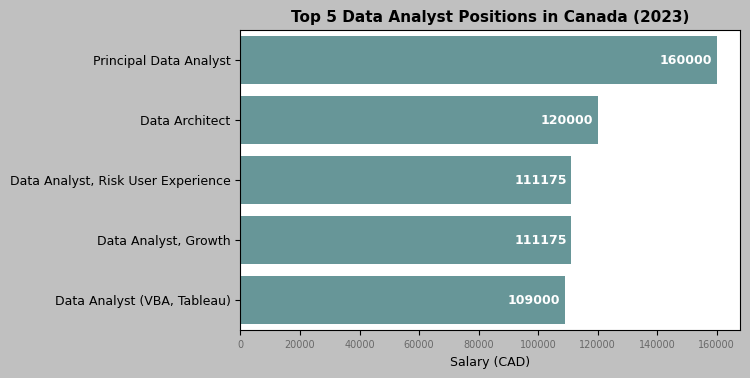

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
top_jobs = pd.read_csv('top_da_positions.csv')

fig = plt.figure(figsize=(5, 3), facecolor='silver')
axes = fig.add_axes([0, 0, 1, 1])
sb.barplot(y=top_jobs['job_position'], x=top_jobs['annual_salary'], errorbar=None, orient='h', color='cadetblue')
for i, (value, title) in enumerate(zip(top_jobs['annual_salary'], top_jobs['job_position'])):
    axes.text(
        value - max(top_jobs['annual_salary']) * 0.01,  
        i,
        f'{value}',
        va='center',
        ha='right',
        color='white',
        fontsize=9,
        weight='semibold')
plt.xticks(fontsize=7,c='dimgrey')
plt.yticks(fontsize=9)
axes.set_title('Top 5 Data Analyst Positions in Canada (2023)', fontsize=11, weight='semibold')
axes.set_ylabel('')
axes.set_xlabel('Salary (CAD)', fontsize=9)

plt.show()

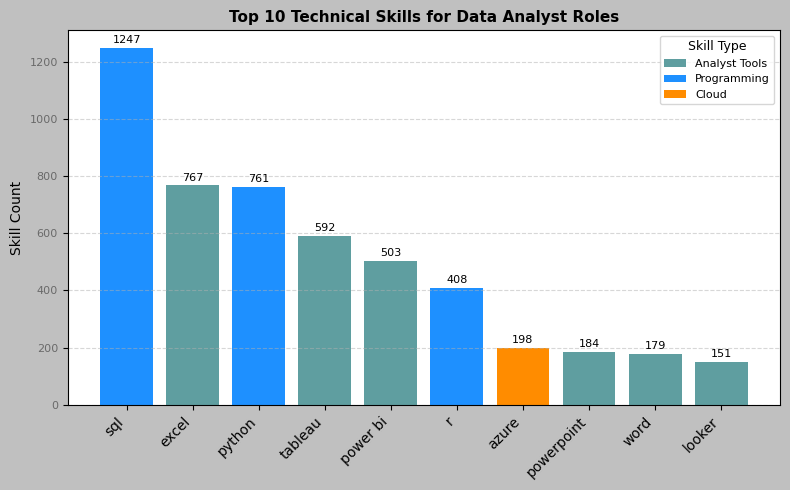

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_skills = pd.read_csv('top_skills_for_da_jobs.csv')

type_colors = {
    'analyst_tools': 'cadetblue',
    'programming': 'dodgerblue',
    'cloud': 'darkorange'}

top_skills['color'] = top_skills['type'].map(type_colors)

plt.figure(figsize=(8,5), facecolor='silver')
bars = plt.bar(top_skills['skills'], top_skills['skill_count'], color=top_skills['color'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.title('Top 10 Technical Skills for Data Analyst Roles', fontsize=11, weight='semibold')
plt.ylabel('Skill Count', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8, c='dimgray')
plt.grid(axis='y', linestyle='--', alpha=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=clr, label=typ.replace('_', ' ').title()) for typ, clr in type_colors.items()]
plt.legend(handles=legend_elements, title='Skill Type', fontsize=8, title_fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()

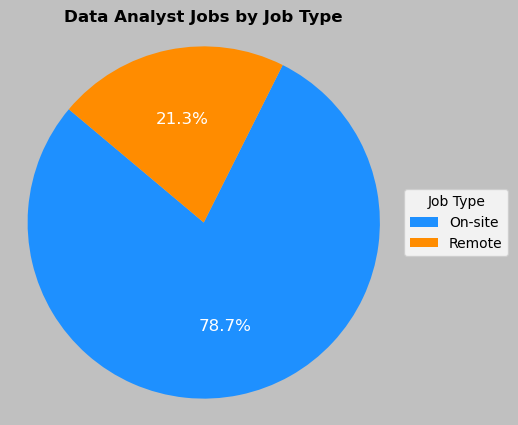

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
job_types = pd.read_csv('job_type.csv')
job_types['job_count'] = job_types['job_count'].astype(int)
colors = ['dodgerblue', 'darkorange']
plt.figure(figsize=(5, 5), facecolor='silver')
plt.pie(
    job_types['job_count'],
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12})
plt.legend(job_types['job_type'], title="Job Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Data Analyst Jobs by Job Type", fontsize=12, weight='semibold')
plt.axis('equal')
plt.show()